In [1]:
import pdb
import numpy as np
from astropy.wcs import WCS
from shift import shift_twod
from VieroLibrary.dist_idl import dist_idl
from VieroLibrary import readcol
from lmfit import Parameters, minimize, fit_report
from smoothmap import smoothmap
from astropy.io import fits
#from fluctfit import simmap_from_cat_five_pops
#from fluctfit import simmap_from_cat_general
from gauss_kern import gauss_kern
#import pylab as pl
import matplotlib.pyplot as plt
import math
import pylab
from grab_random import grab_random
import pylab as plt
from viero_quick_stack import viero_quick_stack

%matplotlib inline  

In [2]:
z_lo = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
z_hi = np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])

m_lo = np.array([8.5, 9.5,10.0,10.5,11.0])
m_hi = np.array([9.5,10.0,10.5,11.0,13.0])

In [3]:
path_map = '/data/maps_cats_models/maps/herschel/hermes/cosmos/'
#file_map = 'cosmos_nest_naive_itermap_4.0_arcsec_pixels'+mapname+'.fits'
#file_mapf = 'cosmos-cropped-uvista-hipe12_itermap_10_iterations_4.0_arcsec_pixels'+mapname+'_flux.fits'
#file_mapn = 'cosmos-cropped-uvista-hipe12_itermap_10_iterations_4.0_arcsec_pixels'+mapname+'_noise.fits'


In [4]:
mapname=['_PSW','_PMW','_PLW']
wavelength=[250,350,500]
nwv = len(mapname)
fwhm =[18.1]#, 25.2, 36.6]
efwhm=[17.6]#, 23.9, 35.2] # want to the measured effective FWHM later
map_files=[]
noise_files=[]
fmf='cosmos-cropped-uvista-hipe12_itermap_10_iterations_4.0_arcsec_pixels'
for m in mapname: map_files.append(path_map + fmf + m + '_flux.fits')
for m in mapname: noise_files.append(path_map+ fmf + m + '_noise.fits')

In [5]:
#z_lo = np.array([1.5])
#z_hi = np.array([2.0])
z_mid = (z_lo+z_hi)/2.0
nz = len(z_mid)

m_mid = (m_lo+m_hi)/2.0
nm = len(m_mid)

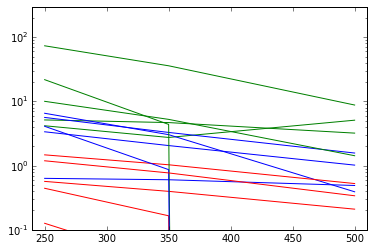

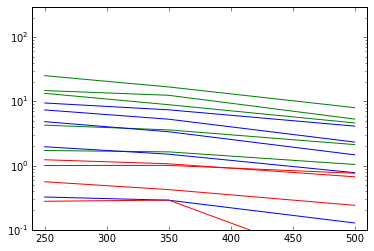

In [ ]:
npop=3
all_stacked_fluxes = np.zeros([nwv,nz,nm*npop])

path_5_pop = '/data/maps_cats_models/catalogs/multi_pop_lists/5pops/'
for iz in range(nz):
    #Stack one z at a time

    list_names=[]
    z_suf = ""+"-".join([str(z_lo[iz]),str(z_hi[iz])])
    for jm in range(nm):
        m_suf = ""+"-".join([str(m_lo[jm]),str(m_hi[jm])])

        file_list ='list_5pop_z-'+z_suf+'_m-'+m_suf+'_sf.csv'
        list_names.append(path_5_pop+file_list)
        file_list ='list_5pop_z-'+z_suf+'_m-'+m_suf+'_qt.csv'
        list_names.append(path_5_pop+file_list)
        file_list ='list_5pop_z-'+z_suf+'_m-'+m_suf+'_agn.csv'
        list_names.append(path_5_pop+file_list)
        #file_list ='list_5pop_z-'+z_suf+'_m-'+m_suf+'_sb.csv'
        #list_names.append(path_5_pop+file_list)
        #file_list ='list_5pop_z-'+z_suf+'_m-'+m_suf+'_loc.csv'
        #list_names.append(path_5_pop+file_list)
    stacked_fluxes =  None
    n_sources_max = None
    #print np.size(map_files)
    #print np.size(noise_files)
    #print np.size(list_names)
    #nlists =  len(list_names)
    #ra, dec = readcol.readcol(list_names[0],fsep=',',twod=False)
    stacked_fluxes = viero_quick_stack(
        map_files,
        list_names,
        noise_files)
    #all_stacked_fluxes[:,iz,:] = stacked_fluxes#[:,j] 
    #print stacked_fluxes
    plt.ylim([-1e-1,3e0])
    plt.ylim([1e-1,3e2])
    plt.xlim([240,510])
    plt.yscale('log')
    for j in range(nm): 
        all_stacked_fluxes[:,iz,npop*j] = stacked_fluxes[:,npop*j]
        all_stacked_fluxes[:,iz,npop*j+1] = stacked_fluxes[:,npop*j+1]
        all_stacked_fluxes[:,iz,npop*j+2] = stacked_fluxes[:,npop*j+2]
        
        plt.plot(wavelength,1e3*stacked_fluxes[:,npop*j],color='b')
        plt.plot(wavelength,1e3*stacked_fluxes[:,npop*j+1],'-',color='r')
        plt.plot(wavelength,1e3*stacked_fluxes[:,npop*j+2],'-',color='g')
        #plt.plot(wavelength,1e3*stacked_fluxes[:,npop*j+3],'--',color='b')
        #plt.plot(wavelength,1e3*stacked_fluxes[:,npop*j+4],'--',color='g')
        #pdb.set_trace()
    plt.show()
    #pdb.set_trace()

In [ ]:
#Multiplot with SED fits?